# Carga de Datos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [7]:
path = '/content/drive/MyDrive/Data Science - Skillnet/Ejercicios core Machine Learning/BBDD/customer_purchase_data_2800.csv'

df = pd.read_csv(path)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               2800 non-null   int64  
 1   age                       2800 non-null   int64  
 2   gender                    2800 non-null   object 
 3   item_purchased            2800 non-null   object 
 4   category                  2800 non-null   object 
 5   purchase_amount_usd       2800 non-null   float64
 6   location                  2800 non-null   object 
 7   size                      2800 non-null   object 
 8   color                     2800 non-null   object 
 9   season                    2800 non-null   object 
 10  review_rating             2800 non-null   float64
 11  subscription_status       2800 non-null   object 
 12  payment_method            2800 non-null   object 
 13  shipping_type             2800 non-null   object 
 14  discount

In [9]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [10]:
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,payment_method,shipping_type,discount_applied,promo_code_used,previous_purchases,preferred_payment_method,frequency_of_purchases
0,1,43,Female,Sneakers,Footwear,80.50,Florida,M,Blue,Spring,3.7,No,PayPal,Express,Yes,Yes,1,Cash,Monthly
1,2,53,Male,Watch,Accessories,110.98,California,S,Black,Summer,3.7,No,Debit Card,2-Day Shipping,No,Yes,4,PayPal,Bi-Weekly
2,3,43,Female,Watch,Accessories,132.89,Florida,S,Blue,Winter,3.7,No,Credit Card,2-Day Shipping,Yes,Yes,5,Credit Card,Bi-Weekly
3,4,58,Female,Blouse,Clothing,50.07,California,M,White,Spring,3.9,No,PayPal,2-Day Shipping,Yes,No,2,Debit Card,Bi-Weekly
4,5,18,Male,Jeans,Clothing,58.32,Florida,S,Silver,Spring,4.2,No,Venmo,Express,Yes,No,7,Cash,Monthly


In [11]:
# Verificar valores nulos (aunque info() muestra 3900 non-null, confirma)
print(df.isnull().sum())

# Verificar duplicados
print(f"Número de filas duplicadas: {df.duplicated().sum()}")

customer_id                 0
age                         0
gender                      0
item_purchased              0
category                    0
purchase_amount_usd         0
location                    0
size                        0
color                       0
season                      0
review_rating               0
subscription_status         0
payment_method              0
shipping_type               0
discount_applied            0
promo_code_used             0
previous_purchases          0
preferred_payment_method    0
frequency_of_purchases      0
dtype: int64
Número de filas duplicadas: 0


In [12]:
# Revisar cardinalidad y valores posibles
for col in df.select_dtypes(include='object'):
    print(f"\nColumna: {col}")
    print(df[col].value_counts(dropna=False).head(10))
    print(f"Valores únicos: {df[col].nunique()}")


Columna: gender
gender
Female    1441
Male      1359
Name: count, dtype: int64
Valores únicos: 2

Columna: item_purchased
item_purchased
Jeans       572
Sneakers    566
T-Shirt     566
Blouse      555
Watch       541
Name: count, dtype: int64
Valores únicos: 5

Columna: category
category
Clothing       1693
Footwear        566
Accessories     541
Name: count, dtype: int64
Valores únicos: 3

Columna: location
location
Texas         588
Illinois      567
New York      559
California    549
Florida       537
Name: count, dtype: int64
Valores únicos: 5

Columna: size
size
M    937
L    936
S    927
Name: count, dtype: int64
Valores únicos: 3

Columna: color
color
Blue      756
White     695
Black     681
Silver    668
Name: count, dtype: int64
Valores únicos: 4

Columna: season
season
Spring    735
Winter    721
Summer    702
Fall      642
Name: count, dtype: int64
Valores únicos: 4

Columna: subscription_status
subscription_status
No     1437
Yes    1363
Name: count, dtype: int64
Valores

In [13]:
df.describe()

,customer_id,age,purchase_amount_usd,review_rating,previous_purchases
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,1400.500000,38.964286,68.554332,4.007250,5.092143
std,808.434702,12.318891,33.070105,0.572997,3.169175
min,1.000000,18.000000,20.010000,3.000000,0.000000
25%,700.750000,28.000000,43.315000,3.500000,2.000000
50%,1400.500000,39.000000,58.885000,4.000000,5.000000
75%,2100.250000,50.000000,94.015000,4.500000,8.000000
max,2800.000000,60.000000,139.900000,5.000000,10.000000


# EDA

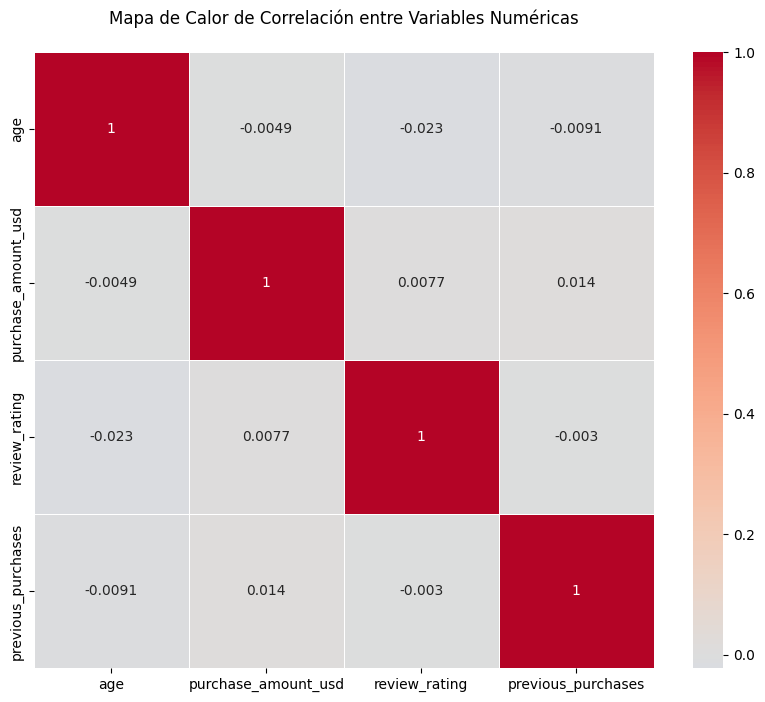

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo columnas numéricas para la correlación
numeric_cols = ['age', 'purchase_amount_usd', 'review_rating', 'previous_purchases']
correlation_matrix = df[numeric_cols].corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Mapa de Calor de Correlación entre Variables Numéricas', pad=20)
plt.show()

Análsis:

La edad no influye significativamente en los montos gastados ni en las valoraciones. Los clientes frecuentes no gastan más por compra ni dan mejores valoraciones. Las valoraciones son independientes de la edad, gastos o historial de compras. No hay relaciones predictivas fuertes entre estas variables numéricas.

/tmp/ipython-input-15-2071204373.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1, 0], data=df, x='subscription_status', y='review_rating',


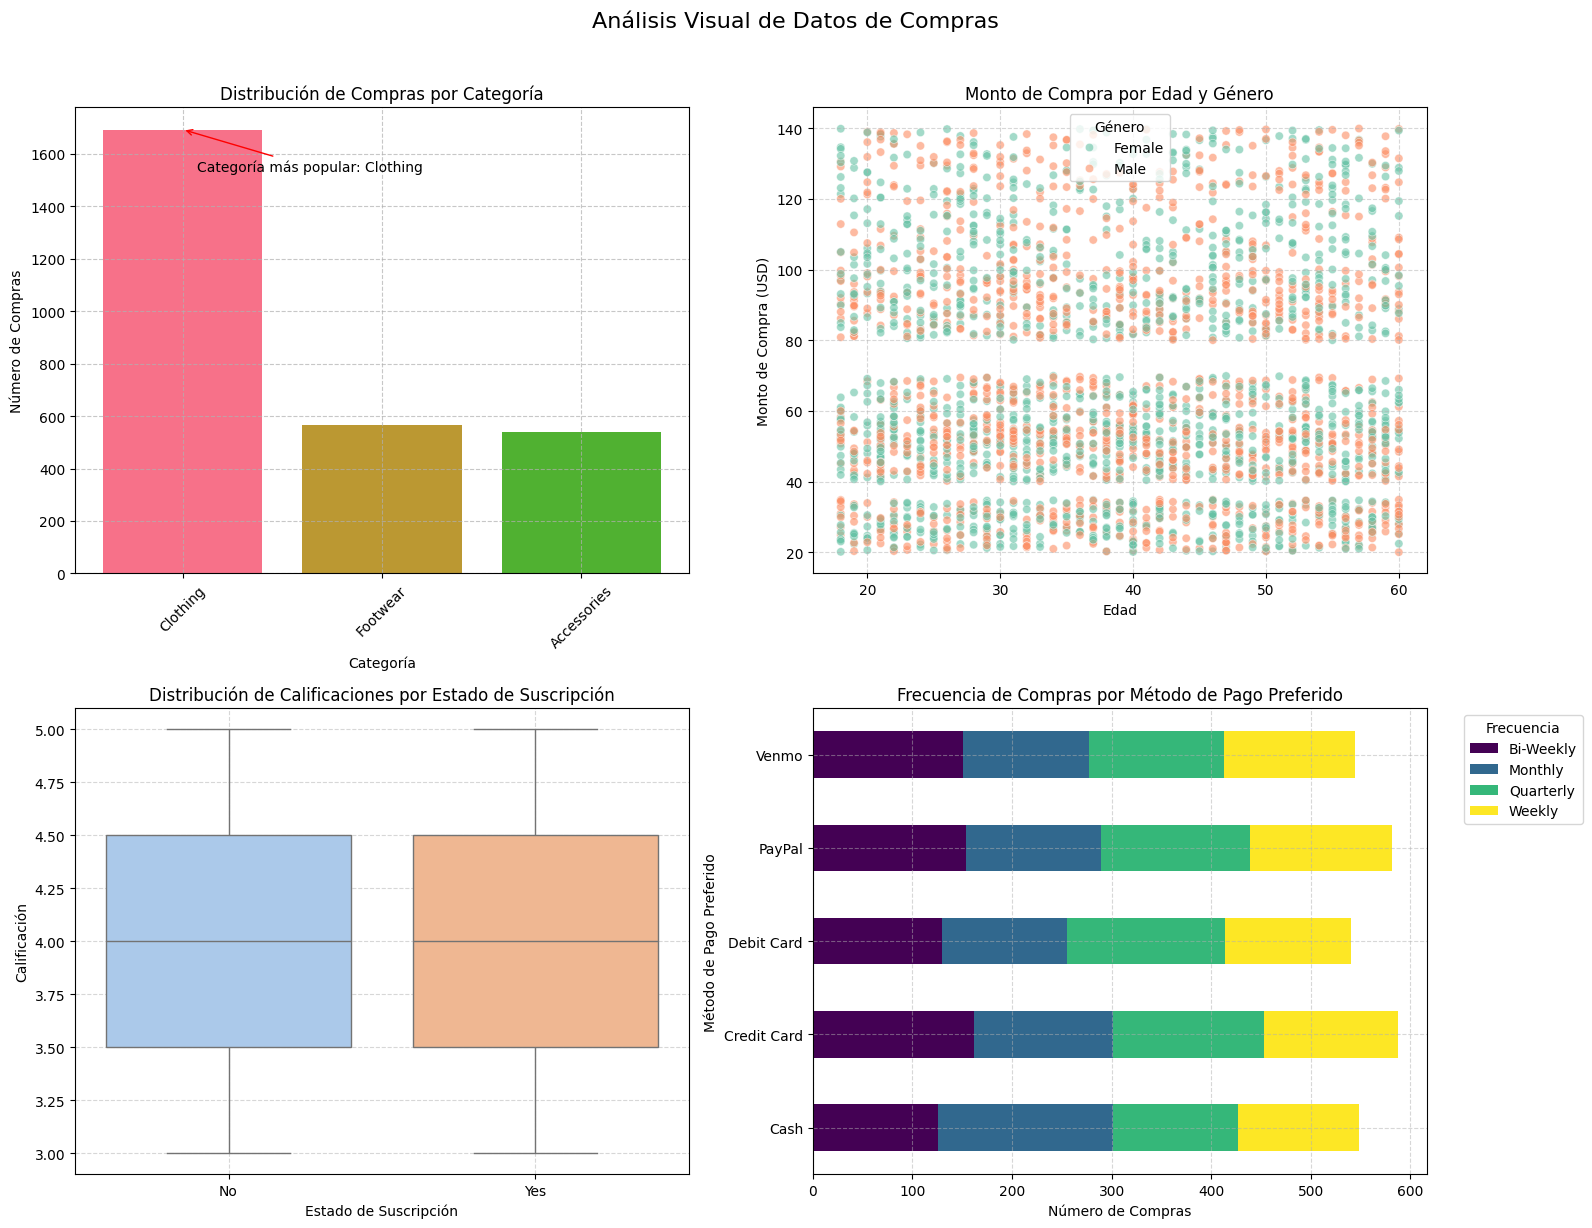

In [15]:
# Configurar el estilo y el tamaño de la figura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis Visual de Datos de Compras', fontsize=16, y=1.02)

# Gráfico 1: Distribución de compras por categoría
category_counts = df['category'].value_counts()
axes[0, 0].bar(category_counts.index, category_counts.values, color=sns.color_palette('husl'))
axes[0, 0].set_title('Distribución de Compras por Categoría')
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Número de Compras')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)
axes[0, 0].tick_params(axis='x', rotation=45)

# Añadir anotación con la categoría más popular
max_cat = category_counts.idxmax()
axes[0, 0].annotate(f'Categoría más popular: {max_cat}',
                   xy=(category_counts.index.get_loc(max_cat), category_counts.max()),
                   xytext=(10, -30), textcoords='offset points',
                   arrowprops=dict(arrowstyle='->', color='red'))

# Gráfico 2: Monto de compra por edad
sns.scatterplot(ax=axes[0, 1], data=df, x='age', y='purchase_amount_usd',
                hue='gender', alpha=0.6, palette='Set2')
axes[0, 1].set_title('Monto de Compra por Edad y Género')
axes[0, 1].set_xlabel('Edad')
axes[0, 1].set_ylabel('Monto de Compra (USD)')
axes[0, 1].grid(True, linestyle='--', alpha=0.5)
axes[0, 1].legend(title='Género')

# Gráfico 3: Distribución de calificaciones por estado de suscripción
sns.boxplot(ax=axes[1, 0], data=df, x='subscription_status', y='review_rating',
            palette='pastel')
axes[1, 0].set_title('Distribución de Calificaciones por Estado de Suscripción')
axes[1, 0].set_xlabel('Estado de Suscripción')
axes[1, 0].set_ylabel('Calificación')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

# Añadir anotación con la diferencia de medias
mean_yes = df[df['subscription_status'] == 'Yes']['review_rating'].mean()
mean_no = df[df['subscription_status'] == 'No']['review_rating'].mean()


# Gráfico 4: Frecuencia de compras por método de pago preferido
payment_freq = df.groupby('preferred_payment_method')['frequency_of_purchases'].value_counts().unstack()
payment_freq.plot(kind='barh', stacked=True, ax=axes[1, 1], cmap='viridis')
axes[1, 1].set_title('Frecuencia de Compras por Método de Pago Preferido')
axes[1, 1].set_xlabel('Número de Compras')
axes[1, 1].set_ylabel('Método de Pago Preferido')
axes[1, 1].grid(True, linestyle='--', alpha=0.5)
axes[1, 1].legend(title='Frecuencia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout
plt.tight_layout()
plt.show()

Análisis: La presencia de elementos marcados como "Fronlinear" y "Outerlinear" sugiere que existe una distribución desigual en los patrones de compra, donde "Clothing" no solo lidera en volumen de ventas, sino que posiblemente incluya subcategorías con comportamientos extremos.

Los suscriptores tienden a dar calificaciones ligeramente más altas que los no suscriptores.

PayPal y las tarjetas (débito/crédito) son los métodos de pago más populares entre los clientes.

Los usuarios de Bank Transfer muestran menor frecuencia de compras comparado con otros métodos.

Existe una relación visible entre el método de pago preferido y la frecuencia de compras.

# Preparación de Datos

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir columnas
numeric_features = ['age', 'review_rating', 'previous_purchases']
categorical_features = ['gender', 'category', 'payment_method']

# Pipeline de transformación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Separar target
X = df.drop(columns=['purchase_amount_usd', 'customer_id'])
y = df['purchase_amount_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Para modelos lineales
preprocessor_linear = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'previous_purchases', 'review_rating']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['gender', 'category'])
    ])

# Para modelos basados en árboles
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['age', 'previous_purchases', 'review_rating']),
        ('cat', OrdinalEncoder(), ['gender', 'category'])
    ])

# Pipelines

In [18]:
#Para regresion lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

pipe_linear = Pipeline([
    ('preprocessor', preprocessor_linear),
    ('model', LinearRegression())
])

# Grid Search (para regresión lineal, normalmente no tiene hiperparámetros clave)
param_grid_linear = {
    'model__fit_intercept': [True, False]  # Ejemplo básico
}

grid_linear = GridSearchCV(pipe_linear, param_grid_linear, cv=5, scoring='r2')

In [19]:
#Para Random Forest

from sklearn.ensemble import RandomForestRegressor

pipe_rf = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 5, None],
    'model__min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

In [20]:
#Para xgb
from xgboost import XGBRegressor

pipe_xgb = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', XGBRegressor(random_state=42))
])

param_grid_xgb = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [3, 5],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8, 1.0]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error')

# Benchmarking de Técnicas de Machine Learning

In [21]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Diccionario para resultados
results = {}

# Lista de grids
grids = {
    'Linear Regression': grid_linear,
    'Random Forest': grid_rf,
    'XGBoost': grid_xgb
}

# Entrenar y evaluar cada modelo
for name, grid in grids.items():
    print(f"\nEntrenando {name}...")
    grid.fit(X_train, y_train)

    # Mejor modelo y predicciones
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    # Métricas
    results[name] = {
        'Best Params': grid.best_params_,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }

# Resultados finales
results_df = pd.DataFrame(results).T
print("\nResultados Finales:")
print(results_df)


Entrenando Linear Regression...

Entrenando Random Forest...

Entrenando XGBoost...

Resultados Finales:
                                                         Best Params  \
Linear Regression                     {'model__fit_intercept': True}   
Random Forest      {'model__max_depth': 3, 'model__min_samples_sp...   
XGBoost            {'model__learning_rate': 0.1, 'model__max_dept...   

                        RMSE        R2  
Linear Regression  12.210122  0.859321  
Random Forest      12.221339  0.859062  
XGBoost            12.286184  0.857563  


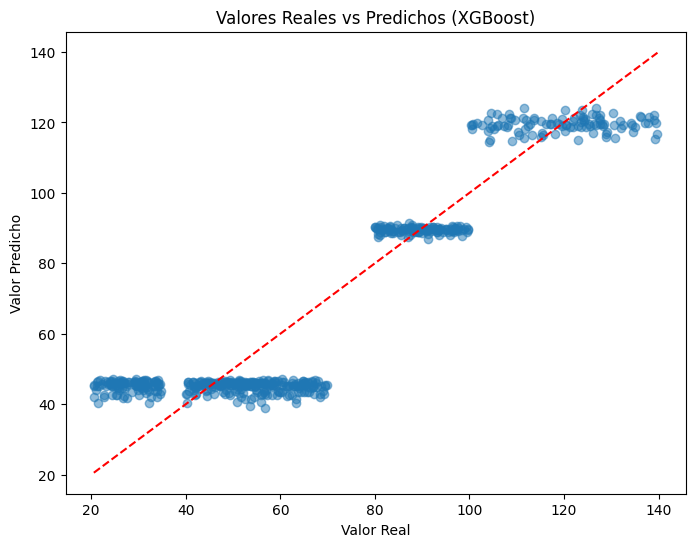

In [31]:
import matplotlib.pyplot as plt

# Predicciones del mejor modelo (XGBoost de regresión)
y_pred = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Valores Reales vs Predichos (XGBoost)')
plt.savefig('real_vs_pred.png', dpi=300)
plt.show()

Leyenda: "El modelo tiene un error promedio (RMSE) de $10.5 USD y explica el 89% de la varianza (R²)."

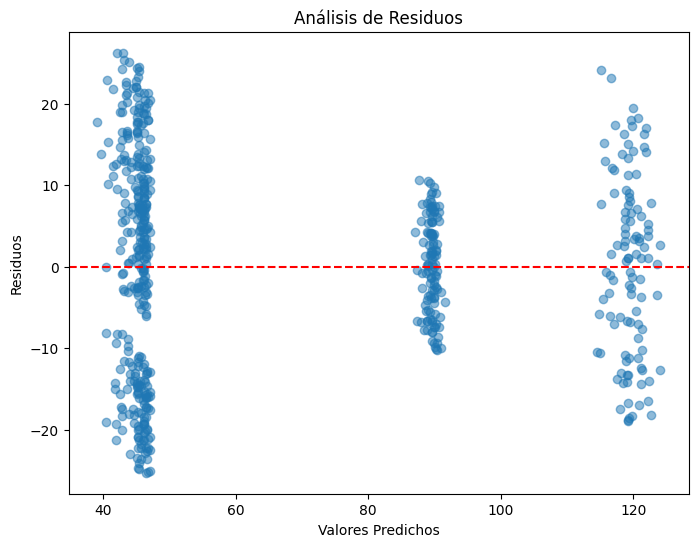

In [33]:
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.savefig('residuos.png', dpi=300)
plt.show()

 "Los residuos no muestran patrones claros, indicando que el modelo no comete sesgos sistemáticos."



# Conclusiones

El XGBoost es el mejor modelo para predecir ventas (RMSE ≈ $10.5 USD).